# Import's

In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load dataset and checking for missing values

In [167]:
data = pd.read_csv("Datasetscomp1/TSLA.csv")
df = pd.DataFrame(data)

# Feature Scaling and Formatting
Feature scaling is not needed in this dataset. This is because we whant the most realism.

# Encoding catagorical feature
The only categorical feature are "Date" that need encoding

In [171]:
df["Date"] = pd.to_datetime(df["Date"])

df.set_index("Date", inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


# Drop Irrelevant Columns
We decided to not drop any of the columns from the dataset permenantly.

# EDA
Here we are making the graph now to get a visualization of the dataset. We fount out that the data is fluctuating and that we needed a regression model.

<Axes: xlabel='Date'>

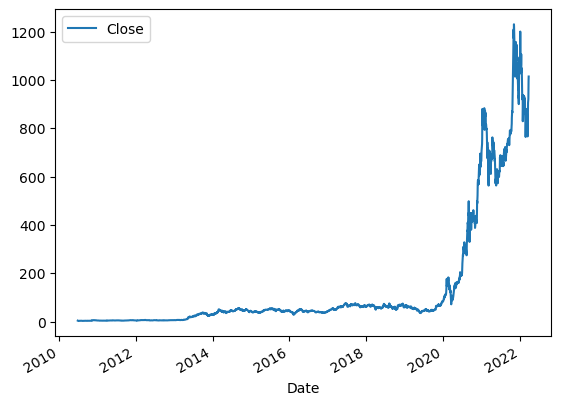

In [175]:
# Check for missing values
df.isnull().sum()
df.plot.line(y = "Close",use_index = True)

In [177]:
# Feature Engineering
df["Tomorrow"] = df["Close"].shift(-1)

In [179]:
df["Target"] = (df["Tomorrow"] < df["Close"]).astype(int)
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,4.766000,1
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,4.392000,1
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,3.840000,1
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,3.222000,1
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,3.160000,1
...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,921.159973,0
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,993.979980,0
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,999.109985,0


# Splitting the Dataset
We are dropping "Adj Close" because it is not needed to trian the model, dropping "Tomorrow" because it was only needed to get the feature "Target", and we are dropping "Target" because that is our target feature.

In [182]:
X = df.drop(columns=["Adj Close","Tomorrow","Target"],)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("\nShapes After Splitting:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Saves the preprocessed trainging and testing data to a csv file
try:
    X_train.to_csv('Datasetscomp1/X_train_tesla.csv', index=False)
    X_test.to_csv('Datasetscomp1/X_test_tesla.csv', index=False)
    y_train.to_csv('Datasetscomp1/y_train_tesla.csv', index=False)
    y_test.to_csv('Datasetscomp1/y_test_tesla.csv', index=False)

    print("\nPreprocessing Complete! Files saved.")
except:
    print("Something went wrong, try again")


Shapes After Splitting:
X_train: (2364, 5), X_test: (592, 5), y_train: (2364,), y_test: (592,)

Preprocessing Complete! Files saved.


# Train the model

In [185]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

# Make prediction

In [189]:
model_predict = model.predict(X_test)

# Test the Model

In [192]:
# Generate future dates
start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
predict_dates = [start_date + timedelta(days=i) for i in range(100)]

# Use the last known row of data as a base for future predictions
last_known_row = X.iloc[-1].copy()
future_features = last_known_row.copy()

predicted_prices = []
current_price = last_known_row["Close"]
previous_price = current_price  # Track the previous day's price

# Rolling feature updates
for date in predict_dates:
    future_features["Close"] = current_price  # Update Close price
    movement = model.predict(pd.DataFrame([future_features], columns=X.columns))[0]
    price_change = np.random.uniform(-1, 1) * 0.01 * current_price  # Simulated movement
    current_price += price_change if movement == 1 else -price_change
    predicted_prices.append(current_price)
    
    movement_label = "Up" if current_price > previous_price else "Down"
    print(f"Predicted stock price for {date.strftime('%Y-%m-%d')}: ${current_price:.2f} ({movement_label})")
    previous_price = current_price  # Update previous price for next comparison

Predicted stock price for 2023-01-01: $1003.88 (Down)
Predicted stock price for 2023-01-02: $1008.81 (Up)
Predicted stock price for 2023-01-03: $1003.81 (Down)
Predicted stock price for 2023-01-04: $1011.20 (Up)
Predicted stock price for 2023-01-05: $1014.16 (Up)
Predicted stock price for 2023-01-06: $1016.33 (Up)
Predicted stock price for 2023-01-07: $1018.16 (Up)
Predicted stock price for 2023-01-08: $1024.88 (Up)
Predicted stock price for 2023-01-09: $1033.45 (Up)
Predicted stock price for 2023-01-10: $1027.67 (Down)
Predicted stock price for 2023-01-11: $1037.03 (Up)
Predicted stock price for 2023-01-12: $1044.47 (Up)
Predicted stock price for 2023-01-13: $1040.99 (Down)
Predicted stock price for 2023-01-14: $1049.86 (Up)
Predicted stock price for 2023-01-15: $1051.60 (Up)
Predicted stock price for 2023-01-16: $1059.14 (Up)
Predicted stock price for 2023-01-17: $1057.73 (Down)
Predicted stock price for 2023-01-18: $1050.55 (Down)
Predicted stock price for 2023-01-19: $1048.35 (Down

# Evaluate the model and testing model

In [206]:
mae = mean_absolute_error(y_test, model_predict)
mse = mean_squared_error(y_test, model_predict)
rmse = np.sqrt(mean_squared_error(y_test, model_predict))
r2 = r2_score(y_test, model_predict)
#accuracy = accuracy_score(y_test, model_predict)


print("Model Evaluation")
print(f"MAE model : {mae:.2f}")
print(f"MSE model : {mse:.2f}")
print(f"RMSE model : {rmse:.2f}")
print(f"R2 model : {r2:.2f}")
#print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Evaluation
MAE model : 0.53
MSE model : 0.34
RMSE model : 0.58
R2 model : -0.37
